In [1]:
from transformers import (
    RobertaForMaskedLM,
    RobertaConfig,
    PreTrainedTokenizerFast,
    DataCollatorForLanguageModeling,
)
from datasets import DatasetDict

# Loading the tokenizer

wrapped_tokenizer = PreTrainedTokenizerFast(
    tokenizer_file="tokenizer_lorenz.json",
    bos_token="[END]",
    eos_token="[END]",
    mask_token="?",
    pad_token="[PAD]",
)

vocab_size = len(wrapped_tokenizer.vocab)

# Loading the saved tokenized dataset
path = "/mnt/home/sgolkar/ceph/datasets/microcosm/lorenz_world_xsmall/clean/"
tokenized_ds = DatasetDict.load_from_disk(path + "tokenized_ds")

In [14]:
tokens = tokenized_ds['train'][4]['input_ids']
print(tokens)

[10, 128, 10, 125, 2, 14, 120, 10, 126, 12, 4, 15, 43, 4, 14, 2, 15, 107, 5, 14, 37, 15, 62, 13, 14, 130, 12, 16, 3, 15, 92, 14, 16, 0, 15, 78, 1, 14, 3, 15, 77, 4, 13, 14, 129, 90, 0, 14, 132, 133, 14, 131, 52, 11, 14, 121, 10, 126, 12, 8, 15, 83, 14, 3, 15, 56, 1, 14, 32, 15, 2, 13, 14, 130, 12, 16, 2, 15, 112, 8, 14, 0, 15, 85, 73, 14, 16, 6, 15, 6, 13, 14, 129, 90, 0, 14, 132, 133, 14, 131, 52, 11, 14, 134, 12, 12, 16, 6, 15, 38, 14, 16, 6, 15, 39, 14, 33, 15, 107, 5, 14, 16, 1, 15, 54, 3, 14, 16, 0, 15, 69, 88, 14, 5, 15, 52, 4, 13, 14, 12, 2, 15, 72, 7, 14, 4, 15, 111, 14, 6, 15, 72, 3, 14, 4, 15, 113, 4, 14, 6, 15, 38, 8, 14, 6, 15, 7, 13, 13, 14, 135, 12, 12, 12, 0, 15, 35, 35, 14, 16, 0, 15, 89, 3, 14, 16, 0, 15, 72, 35, 14, 0, 15, 22, 52, 2, 14, 16, 0, 15, 45, 2, 14, 16, 0, 15, 60, 31, 13, 14, 12, 16, 0, 15, 99, 64, 14, 16, 0, 15, 48, 96, 14, 16, 0, 15, 32, 98, 14, 16, 0, 15, 25, 46, 14, 16, 0, 15, 39, 1, 14, 0, 15, 67, 117, 13, 14, 12, 0, 15, 24, 87, 8, 14, 16, 0, 15, 57, 33

In [15]:
text = wrapped_tokenizer.decode(tokens)
print(text)

{'description':{'num_sys':2,'sys0':{'params':[4.234,2.875,17.42],'init_point':[-3.72,-0.581,3.574],'step_size':700,'name':'lorenz','step_multip':32},'sys1':{'params':[8.63,3.361,12.2],'init_point':[-2.928,0.6553,-6.6],'step_size':700,'name':'lorenz','step_multip':32},'normalization':[[-6.18,-6.19,13.875,-1.343,-0.4968,5.324],[2.527,4.91,6.523,4.934,6.188,6.7]],'embedding':[[[0.1515,-0.693,-0.5215,0.02322,-0.252,-0.4011],[-0.7944,-0.2876,-0.1278,-0.0526,-0.191,0.4797],[0.04678,-0.3713,0.2091,-0.75,0.503,0.02861],[0.2896,-0.1465,0.4788,-0.2683,-0.7456,0.1931],[-0.238,-0.394,0.6616,0.457,0.157,-0.3413],[-0.4504,0.3496,0.03004,-0.3914,-0.258,-0.674]],[1.0,1.0,1.0,100.0,100.0,100.0],[[0.0878,-0.5,0.2754,-0.08704,0.328,0.2203,-0.2913,0.5444,-0.3489],[-0.1414,-0.0284,-0.4014,-0.05493,0.1957,-0.09076,0.0573,-0.3682,-0.7935],[0.05814,-0.2593,-0.121,0.704,0.03275,-0.6074,0.0902,0.2018,0.001818],[0.0964,-0.195,0.02913,-0.2664,-0.784,-0.1316,0.316,0.2615,-0.2834],[-0.001868,0.03696,0.1118,0.2822,0

In [16]:
dict_ = eval(text)
dict_.keys()

dict_keys(['description', 'data'])

In [18]:
dict_['description'].keys()

dict_keys(['num_sys', 'sys0', 'sys1', 'normalization', 'embedding'])

In [21]:
import numpy as np
data = np.array(dict_['data'])
data.shape

(40, 9)

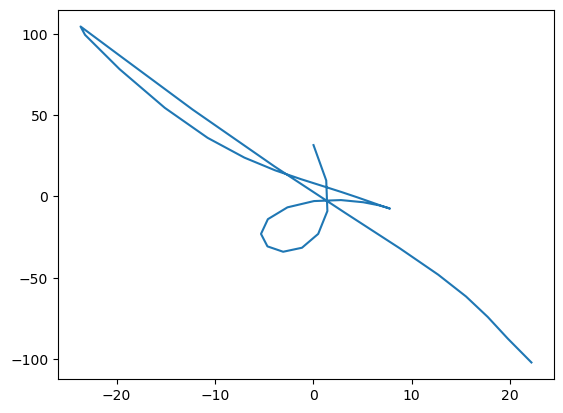

In [23]:
import matplotlib.pyplot as plt
plt.plot(data[:,0],data[:,1]);

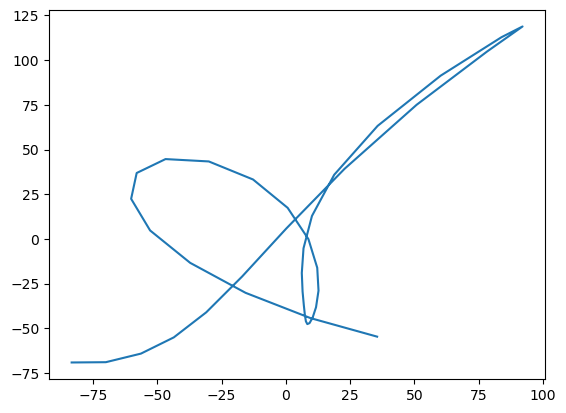

In [24]:
plt.plot(data[:,2],data[:,3]);